<a href="https://colab.research.google.com/github/aMalling/KFEAPPEN_clone/blob/main/stata_to_python_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 From Stata to Python: Data Science Workshop
Welcome! In this workshop we’ll translate familiar Stata commands into Python code using `pandas`, `statsmodels`, and `scikit-learn`.
We’ll also end with a quick intro to Machine Learning and Neural Nets.

## 0. Setup: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## 1. Load Data

In [ ]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv"
df = pd.read_csv(url)
df.head()

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 2. Inspecting Data (Stata vs Python)

In [ ]:
df.info()
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.53

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 3. Data Manipulation

In [ ]:
# Equivalent to: generate mpg_sq = mpg^2
df['mpg_sq'] = df['mpg']**2

# Equivalent to: keep if mpg > 20
df_subset = df[df['mpg'] > 20]
df_subset.head()

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_sq
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,441.00
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,441.00
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,519.84
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,457.96
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,595.36


## 4. Summary Statistics & Grouping

In [ ]:
# Equivalent to: by cyl: summarize mpg
print(df.groupby('cyl')['mpg'].mean())

# Multiple stats
df.groupby('cyl').agg({
    'mpg': ['mean', 'std'],
    'hp': 'median'
})

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64


mpg               hp
          mean       std median
cyl                            
4    26.663636  4.509828   91.0
6    19.742857  1.453567  110.0
8    15.100000  2.560048  192.5

## 5. Regression (Econometrics style)

In [ ]:
model = smf.ols("mpg ~ hp + wt", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           9.11e-12
Time:                        05:37:50   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.0

## 6. Visualization

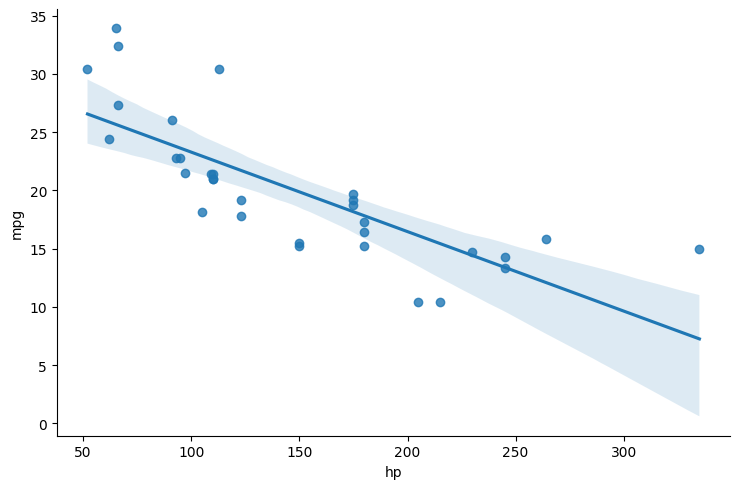

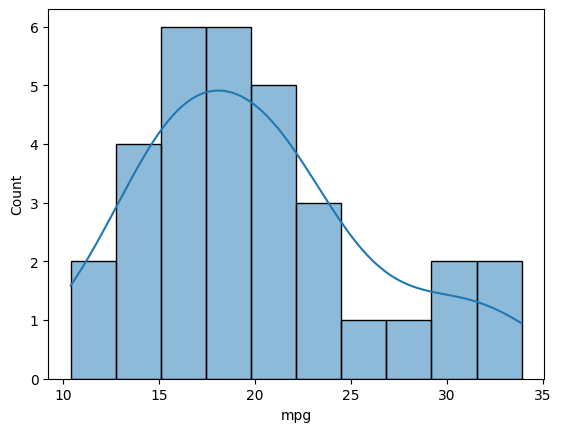

In [ ]:
sns.lmplot(data=df, x='hp', y='mpg', height=5, aspect=1.5)
plt.show()

sns.histplot(df['mpg'], bins=10, kde=True)
plt.show()

## 7. Challenge Exercise
- Create a new variable = hp/wt
- Keep only cars with mpg > 25
- Run regression mpg on hp, wt, and the new variable
- Plot regression line

## 8. Intro to Machine Learning (Linear Regression)

Intercept: 37.081700458364196
Coefficients: [-0.03488059 -3.80235699]
R^2: 0.8128475226614876
RMSE: 6.360582810074415


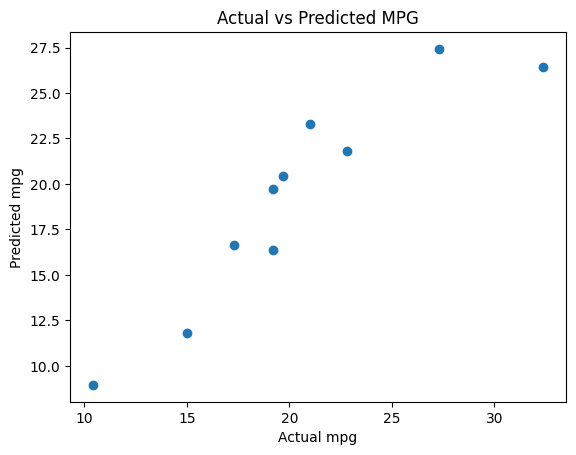

In [ ]:
X = df[['hp', 'wt']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ml_model = LinearRegression()
ml_model.fit(X_train, y_train)
y_pred = ml_model.predict(X_test)

print("Intercept:", ml_model.intercept_)
print("Coefficients:", ml_model.coef_)
print("R^2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")
plt.title("Actual vs Predicted MPG")
plt.show()

## 9. Neural Networks (Classification Example)

In [ ]:
# Define target: high_mpg (1 if mpg>20 else 0)
df['high_mpg'] = (df['mpg'] > 20).astype(int)

X = df[['hp', 'wt']]
y = df['high_mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nn = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9
